In [4]:
import numpy as np
from sklearn.datasets import load_boston
import sys
from LinearModels.ridge_regression import RidgeRegression
from utils import standardize

In [5]:
boston = load_boston()
X      = boston.data
y      = boston.target

In [6]:
X = standardize(X)

In [7]:
import matplotlib.pyplot as plt

The following shows the path of each variable coefficient as a function of regularization strength.

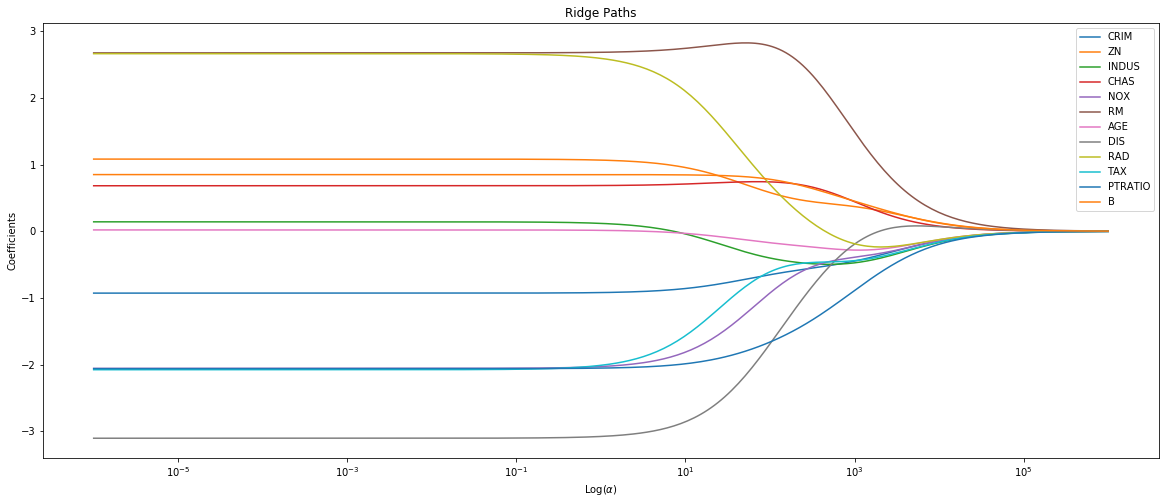

In [23]:
# Initialize variables
alpha_list = []
alphas     = np.logspace(-6,6,300) #Range of lambda values

#Run lasso regression for each lambda
for alpha in alphas:
     ridge = RidgeRegression(alpha=alpha, gd=False)
     ridge.fit(X, y)
     alpha_list.append(ridge.w[1:])

#Stack into numpy array
alpha_stack = np.stack(alpha_list).T

#Plot results
n, _ = alpha_stack[1:].shape
plt.figure(figsize = (20,8))

for i in range(n):
    plt.plot(alphas, alpha_stack[i], label = boston.feature_names[i])

plt.xscale('log')
plt.xlabel('Log($\\alpha$)')
plt.ylabel('Coefficients')
plt.title('Ridge Paths')
plt.legend()